# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | badger
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | inhambane
Processing Record 5 of Set 1 | bhinmal
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | lamu
Processing Record 8 of Set 1 | freetown
Processing Record 9 of Set 1 | nemuro
Processing Record 10 of Set 1 | igarka
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | haiku-pauwela
Processing Record 13 of Set 1 | ta`u
Processing Record 14 of Set 1 | kidal
Processing Record 15 of Set 1 | st austell
Processing Record 16 of Set 1 | masterton
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | uturoa
Processing Record 20 of Set 1 | west island
Processing Record 21 of Set 1 | aconibe
Processing Record 22 of Set 1 | iquitos
Processing Record 23 of 

In [4]:
response = requests.get(city_url)
print(response.status_code) 

200


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [6]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,badger,64.8000,-147.5333,62.01,33,40,4.61,US,1715804851
1,grytviken,-54.2811,-36.5092,27.01,84,100,15.30,GS,1715804851
2,avarua,-21.2078,-159.7750,75.25,88,75,16.11,CK,1715804851
3,inhambane,-23.8650,35.3833,73.29,78,89,7.96,MZ,1715804851
4,bhinmal,25.0000,72.2500,87.39,41,4,9.48,IN,1715804851
5,lamu,-2.2717,40.9020,81.05,83,54,15.75,KE,1715804851
6,freetown,8.4840,-13.2299,81.61,81,98,6.67,SL,1715804851
7,nemuro,43.3236,145.5750,42.84,98,100,7.85,JP,1715804676
8,igarka,67.4667,86.5833,15.03,96,92,8.99,RU,1715804852
9,bethel,41.3712,-73.4140,64.54,86,100,8.05,US,1715804852


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,62.01,33,40,4.61,US,1715804851
1,grytviken,-54.2811,-36.5092,27.01,84,100,15.30,GS,1715804851
2,avarua,-21.2078,-159.7750,75.25,88,75,16.11,CK,1715804851
3,inhambane,-23.8650,35.3833,73.29,78,89,7.96,MZ,1715804851
4,bhinmal,25.0000,72.2500,87.39,41,4,9.48,IN,1715804851


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

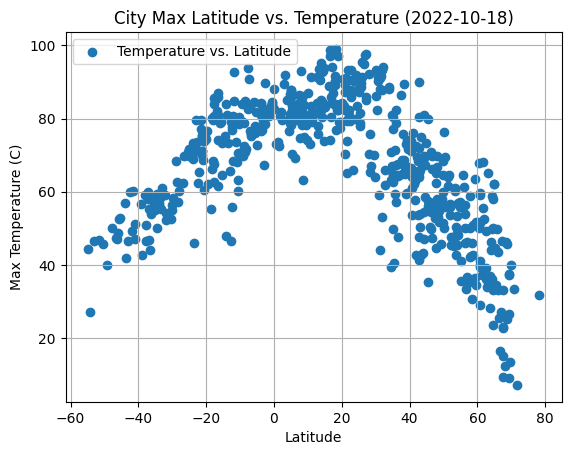

In [20]:
# Build scatter plot for latitude vs. temperature

# Extract latitude and temperature columns from the DataFrame
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']

plt.scatter(latitude, temperature, label='Temperature vs. Latitude')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title( 'City Max Latitude vs. Temperature (2022-10-18)')

# Add grid
plt.grid(True)

# Add legend
plt.legend()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

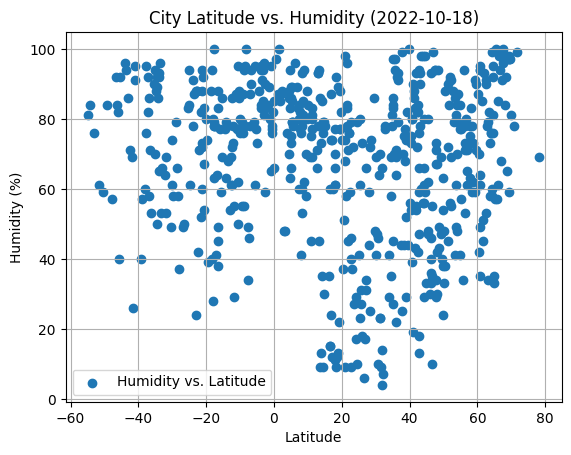

In [21]:
# Build the scatter plots for latitude vs. humidity

# Extract latitude and humidity columns from the DataFrame
latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']

plt.scatter(latitude, humidity, label='Humidity vs. Latitude')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2022-10-18)')

# Add grid
plt.grid(True)

# Add legend
plt.legend()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

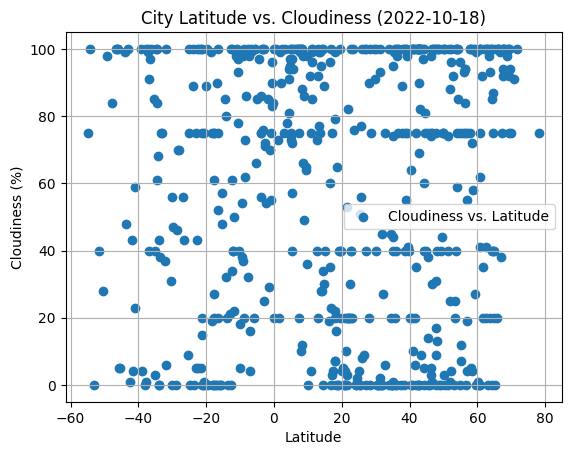

In [23]:
# Build the scatter plots for latitude vs. cloudiness

# Extract latitude and cloudiness columns from the DataFrame
latitude = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']

plt.scatter(latitude, cloudiness, label='Cloudiness vs. Latitude')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')

# Add grid
plt.grid(True)

# Add legend
plt.legend()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

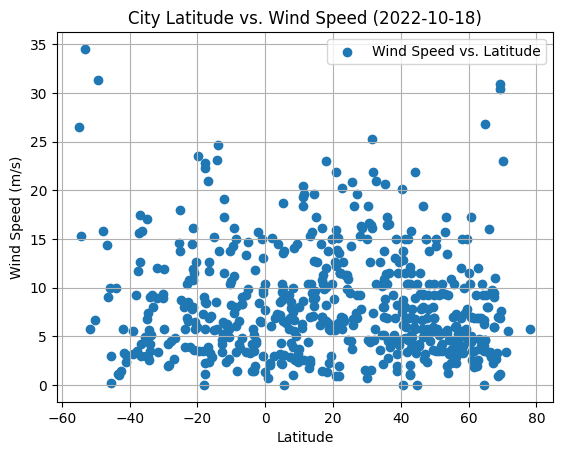

In [24]:
# Build the scatter plots for latitude vs. wind speed

# Extract latitude and wind speed columns from the DataFrame
latitude = city_data_df['Lat']
wind_speed = city_data_df['Wind Speed']

plt.scatter(latitude, wind_speed, label='Wind Speed vs. Latitude')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2022-10-18)')

# Add grid
plt.grid(True)

# Add legend
plt.legend()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


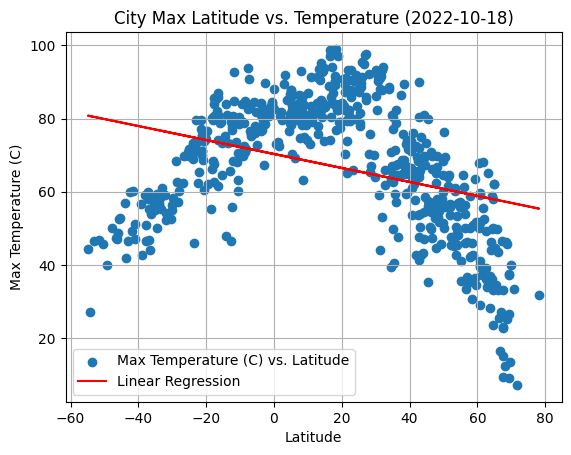

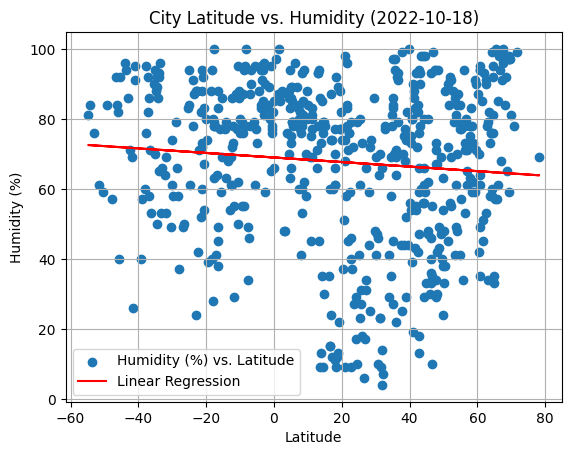

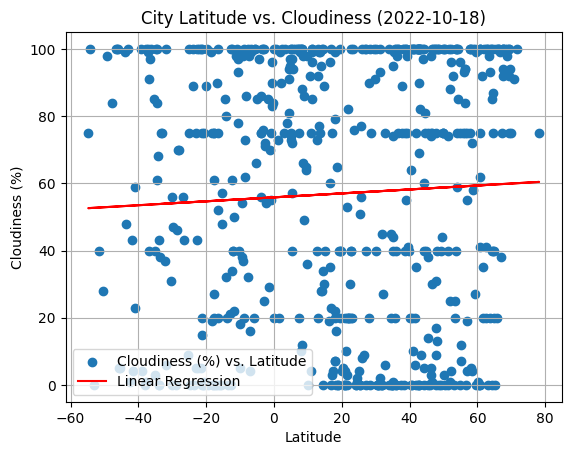

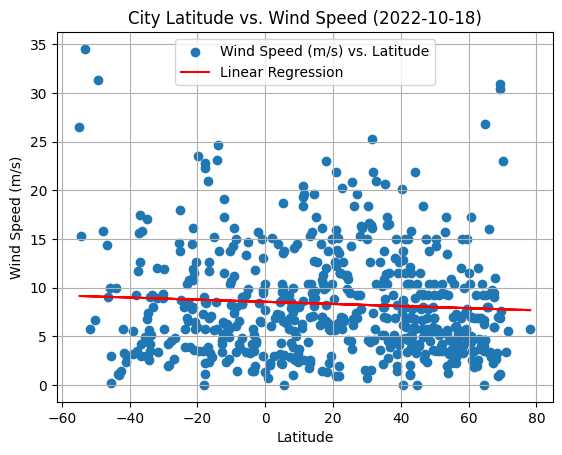

In [27]:
# Define a function to create Linear Regression plots
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

def plot_regression(x, y, xlabel, ylabel, title, savefig_name):
    # Scatter plot
    plt.scatter(x, y, label=f'{ylabel} vs. {xlabel}')
    
    # Fit linear regression
    model = LinearRegression()
    model.fit(x.values.reshape(-1, 1), y)
    plt.plot(x, model.predict(x.values.reshape(-1, 1)), color='red', label='Linear Regression')
    
    # Graph properties
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    
    # Save and show plot
    plt.savefig(savefig_name)
    plt.show()

# Plotting for each relationship
plot_regression(city_data_df['Lat'], city_data_df['Max Temp'], 'Latitude', 'Max Temperature (C)', 
                'City Max Latitude vs. Temperature (2022-10-18)', 'output_data/Fig1_with_regression.png')

plot_regression(city_data_df['Lat'], city_data_df['Humidity'], 'Latitude', 'Humidity (%)', 
                'City Latitude vs. Humidity (2022-10-18)', 'output_data/Fig2_with_regression.png')

plot_regression(city_data_df['Lat'], city_data_df['Cloudiness'], 'Latitude', 'Cloudiness (%)', 
                'City Latitude vs. Cloudiness (2022-10-18)', 'output_data/Fig3_with_regression.png')

plot_regression(city_data_df['Lat'], city_data_df['Wind Speed'], 'Latitude', 'Wind Speed (m/s)', 
                'City Latitude vs. Wind Speed (2022-10-18)', 'output_data/Fig4_with_regression.png')


In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,62.01,33,40,4.61,US,1715804851
4,bhinmal,25.0000,72.2500,87.39,41,4,9.48,IN,1715804851
6,freetown,8.4840,-13.2299,81.61,81,98,6.67,SL,1715804851
7,nemuro,43.3236,145.5750,42.84,98,100,7.85,JP,1715804676
8,igarka,67.4667,86.5833,15.03,96,92,8.99,RU,1715804852


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,27.01,84,100,15.30,GS,1715804851
2,avarua,-21.2078,-159.7750,75.25,88,75,16.11,CK,1715804851
3,inhambane,-23.8650,35.3833,73.29,78,89,7.96,MZ,1715804851
5,lamu,-2.2717,40.9020,81.05,83,54,15.75,KE,1715804851
11,ta`u,-14.2336,-169.5144,83.97,79,32,23.11,AS,1715804852


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8124290290


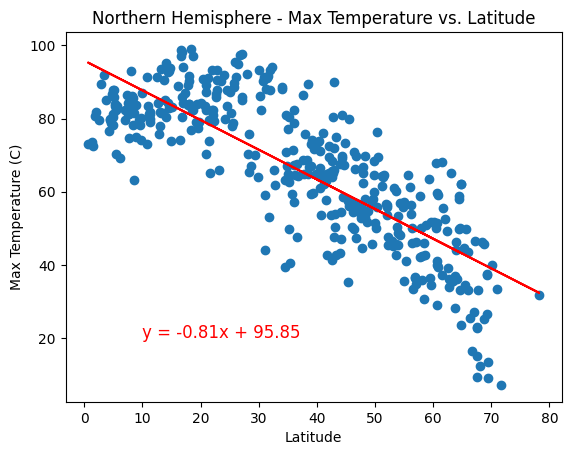

In [72]:
# Linear regression on Northern Hemisphere
# Extract latitude and temperature columns from the DataFrame
latitude_nh = northern_hemi_df['Lat']
temperature_nh = northern_hemi_df['Max Temp']

# Perform linear regression using linregress
slope, intercept, r_value, p_value, std_err = linregress(latitude_nh, temperature_nh)

# Plot scatter plot
plt.scatter(latitude_nh, temperature_nh, label='Temperature vs. Latitude (Northern Hemisphere)')

# Plot linear regression line
plt.plot(latitude_nh, slope * latitude_nh + intercept, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Northern Hemisphere - Max Temperature vs. Latitude')

# Print R-value and equation of the line
equation = f"y = {slope:.2f}x + {intercept:.2f}"
r_value_text = f"R-value = {r_value:.2f}" 
plt.text(10, 20, equation, fontsize=12, color='red')

print(f"The r-value is: {r_value:.10f}")

# Display plot
plt.show()

The r-value is: 0.8298300958


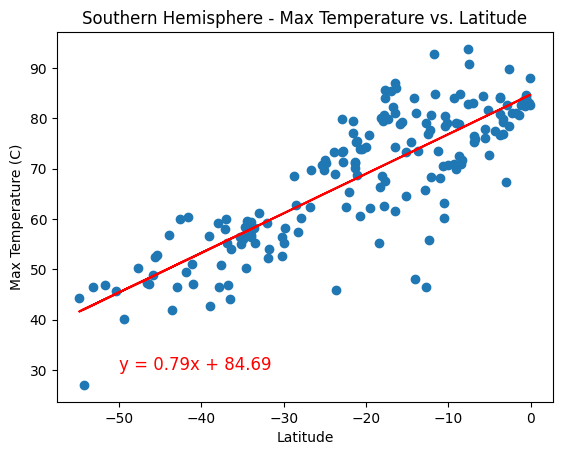

In [74]:
# Linear regression on Southern Hemisphere

# Extract latitude and temperature columns from the DataFrame
latitude_sh = southern_hemi_df['Lat']
temperature_sh = southern_hemi_df['Max Temp']

# Perform linear regression using linregress
slope, intercept, r_value, p_value, std_err = linregress(latitude_sh, temperature_sh)

# Plot scatter plot
plt.scatter(latitude_sh, temperature_sh, label='Temperature vs. Latitude (Southern Hemisphere)')

# Plot linear regression line
plt.plot(latitude_sh, slope * latitude_sh + intercept, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Southern Hemisphere - Max Temperature vs. Latitude')

# Print R-value and equation of the line
equation = f"y = {slope:.2f}x + {intercept:.2f}"
r_value_text = f"R-value = {r_value:.2f}"  
plt.text(-50, 30, equation, fontsize=12, color='red')
print(f"The r-value is: {r_value:.10f}")

# Display plot
plt.show()

**Discussion about the linear relationship:**

***Northern Hemisphere:***


Equation of the line: y=−0.81x+95.85

R-value: -0.8124

Interpretation: The negative R-value indicates a negative correlation between temperature and latitude in the Northern Hemisphere. As latitude increases (moving towards the North Pole), the temperature tends to decrease. The R-value of approximately -0.8124 implies a moderately strong linear relationship between temperature and latitude.

***Southern Hemisphere:***


Equation of the line: y=0.79x+84.69

R-value: 0.8298

Interpretation: The positive R-value suggests a positive correlation between temperature and latitude in the Southern Hemisphere. As latitude increases (moving towards the South Pole), the temperature tends to increase. The R-value of approximately 0.8298 indicates a moderately strong linear relationship between temperature and latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.0916841997


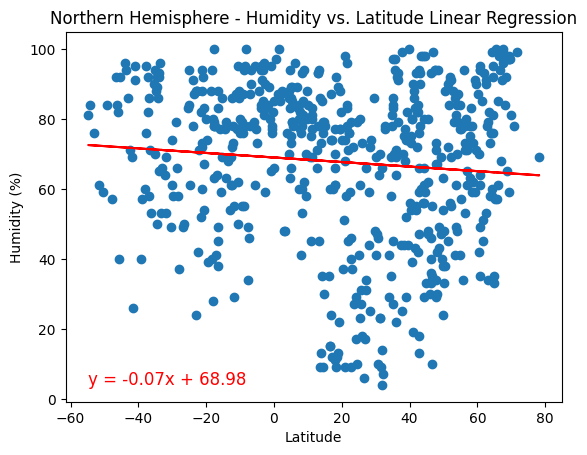

In [75]:
# Northern Hemisphere

# Extract latitude and humidity columns from the DataFrame
latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']

# Perform linear regression using linregress
slope, intercept, r_value, p_value, std_err = linregress(latitude, humidity)

# Plot scatter plot
plt.scatter(latitude, humidity, label='Humidity vs. Latitude')

# Plot linear regression line
plt.plot(latitude, slope * latitude + intercept, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')

# Print R-value and equation of the line
equation = f"y = {slope:.2f}x + {intercept:.2f}"
r_value_text = f"R-value = {r_value:.2f}" 
plt.text(latitude.min(), humidity.min(), equation, fontsize=12, color='red')
print(f"The r-value is: {r_value:.10f}")

# Display plot
plt.show()

The r-value is: -0.0916841997


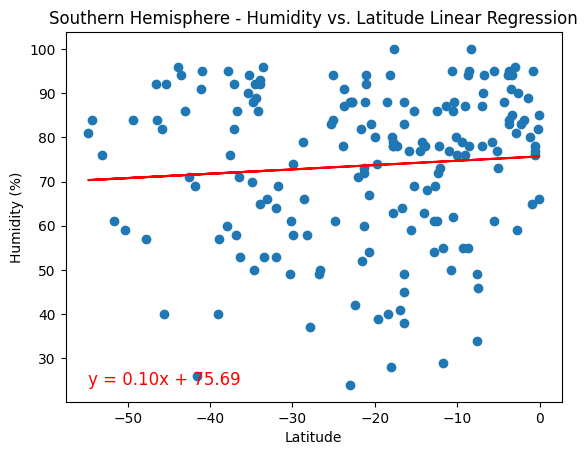

In [76]:
# Southern Hemisphere

# Extract latitude and humidity columns from the DataFrame for the Southern Hemisphere
latitude_sh = city_data_df[city_data_df['Lat'] < 0]['Lat']
humidity_sh = city_data_df[city_data_df['Lat'] < 0]['Humidity']

# Perform linear regression using linregress for the Southern Hemisphere
slope_sh, intercept_sh, r_value_sh, p_value_sh, std_err_sh = linregress(latitude_sh, humidity_sh)

# Plot scatter plot
plt.scatter(latitude_sh, humidity_sh, label='Humidity vs. Latitude (Southern Hemisphere)')

# Plot linear regression line for the Southern Hemisphere
plt.plot(latitude_sh, slope_sh * latitude_sh + intercept_sh, color='red', label='Linear Regression')

# Add labels and title for the Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')

# Print R-value and equation of the line for the Southern Hemisphere
equation_sh = f"y = {slope_sh:.2f}x + {intercept_sh:.2f}"
r_value_text = f"R-value = {r_value:.2f}" 
plt.text(latitude_sh.min(), humidity_sh.min(), equation_sh, fontsize=12, color='red')
print(f"The r-value is: {r_value:.10f}")

# Display plot for the Southern Hemisphere
plt.show()

**Discussion about the linear relationship:** 

***Northern Hemisphere:***


Equation of the line: y=−0.07x+68.98

R-value: -0.0917

Interpretation:
The negative R-value indicates a very weak negative correlation between humidity and latitude in the Northern Hemisphere. As latitude increases (moving towards the North Pole), humidity tends to slightly decrease, but the relationship is almost negligible. The R-value of approximately -0.0917 suggests that there is almost no linear relationship between humidity and latitude in this hemisphere based on the given data.

***Southern Hemisphere:***


Equation of the line: y=0.10x+75.69

R-value: -0.0917

Interpretation:
The negative R-value indicates a very weak negative correlation between humidity and latitude in the Southern Hemisphere. As latitude increases (moving towards the South Pole), humidity tends to slightly decreases. The R-value of approximately -0.0917 suggests that there is almost no linear relationship between humidity and latitude in this hemisphere based on the given data.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.0916841997


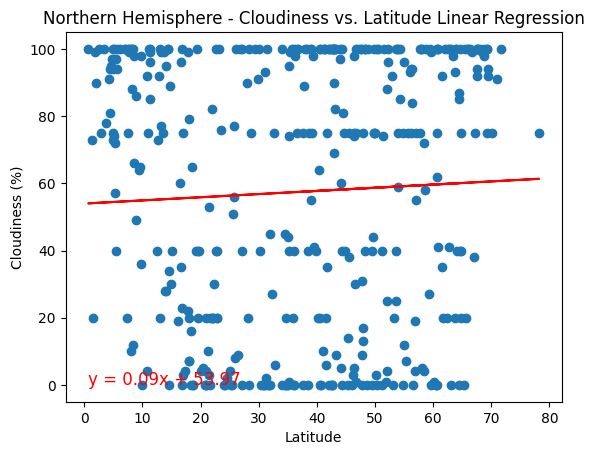

In [79]:
# Northern Hemisphere

# Extract latitude and cloudiness columns from the DataFrame for the Northern Hemisphere
latitude_nh = city_data_df[city_data_df['Lat'] >= 0]['Lat']
cloudiness_nh = city_data_df[city_data_df['Lat'] >= 0]['Cloudiness']

# Perform linear regression using linregress for the Northern Hemisphere
slope_nh, intercept_nh, r_value_nh, p_value_nh, std_err_nh = linregress(latitude_nh, cloudiness_nh)

# Plot scatter plot for the Northern Hemisphere
plt.scatter(latitude_nh, cloudiness_nh, label='Cloudiness vs. Latitude (Northern Hemisphere)')

# Plot linear regression line for the Northern Hemisphere
plt.plot(latitude_nh, slope_nh * latitude_nh + intercept_nh, color='red', label='Linear Regression')

# Add labels and title for the Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')

# Print R-value and equation of the line for the Northern Hemisphere
equation_nh = f"y = {slope_nh:.2f}x + {intercept_nh:.2f}"
r_value_text = f"R-value = {r_value:.2f}" 
plt.text(latitude_nh.min(), cloudiness_nh.min(), equation_nh, fontsize=12, color='red')
print(f"The r-value is: {r_value:.10f}")

# Display plot for the Northern Hemisphere
plt.show()

The r-value is: -0.0916841997


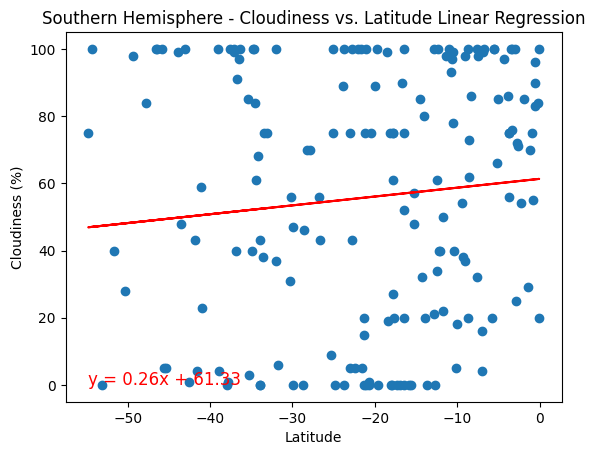

In [80]:
# Southern Hemisphere

# Extract latitude and cloudiness columns from the DataFrame for the Southern Hemisphere
latitude_sh = city_data_df[city_data_df['Lat'] < 0]['Lat']
cloudiness_sh = city_data_df[city_data_df['Lat'] < 0]['Cloudiness']

# Perform linear regression using linregress for the Southern Hemisphere
slope_sh, intercept_sh, r_value_sh, p_value_sh, std_err_sh = linregress(latitude_sh, cloudiness_sh)

# Plot scatter plot for the Southern Hemisphere
plt.scatter(latitude_sh, cloudiness_sh, label='Cloudiness vs. Latitude (Southern Hemisphere)')

# Plot linear regression line for the Northern Hemisphere
plt.plot(latitude_sh, slope_sh * latitude_sh + intercept_sh, color='red', label='Linear Regression')

# Add labels and title for the Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')

# Print R-value and equation of the line for the Southern Hemisphere
equation_sh = f"y = {slope_sh:.2f}x + {intercept_sh:.2f}"
r_value_text = f"R-value = {r_value:.2f}" 
plt.text(latitude_sh.min(), cloudiness_sh.min(), equation_sh, fontsize=12, color='red')
print(f"The r-value is: {r_value:.10f}")

# Display plot for the Southern Hemisphere
plt.show()

**Discussion about the linear relationship:** 

***Northern Hemisphere:***

Equation of the line: y=0.09x+53.97

R-value: -0.0917

Interpretation:
The negative R-value indicates a very weak negative correlation between cloudiness and latitude in the Northern Hemisphere. The equation of the line suggests that as latitude increases (moving towards the North Pole), cloudiness tends to slightly decrease, but the relationship is almost negligible. The R-value of approximately -0.0917 suggests that there is almost no linear relationship between cloudiness and latitude in this hemisphere based on the given data.

***Southern Hemisphere:***

Equation of the line: y=0.26x+61.33

R-value: -0.0917

Interpretation:
Similarly, the negative R-value indicates a very weak negative correlation between cloudiness and latitude in the Southern Hemisphere. The equation of the line suggests that as latitude increases (moving towards the South Pole), cloudiness tends to slightly decrease. The R-value of approximately -0.0917 suggests that there is almost no linear relationship between cloudiness and latitude in this hemisphere based on the given data.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.0916841997


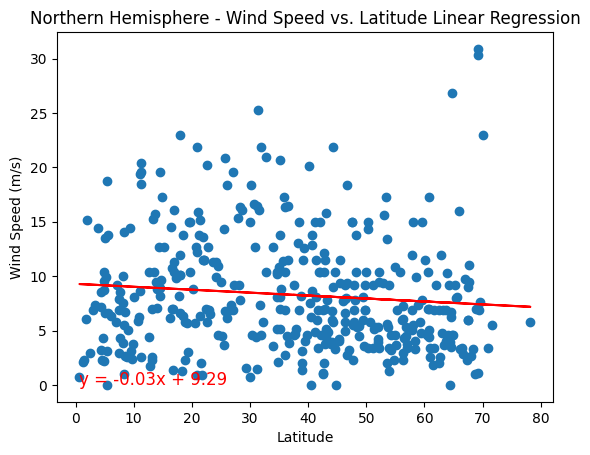

In [81]:
# Northern Hemisphere

# Extract latitude and wind speed columns from the DataFrame for the Northern Hemisphere
latitude_nh = city_data_df[city_data_df['Lat'] >= 0]['Lat']
wind_speed_nh = city_data_df[city_data_df['Lat'] >= 0]['Wind Speed']

# Perform linear regression using linregress for the Northern Hemisphere
slope_nh, intercept_nh, r_value_nh, p_value_nh, std_err_nh = linregress(latitude_nh, wind_speed_nh)

# Plot scatter plot for the Northern Hemisphere
plt.scatter(latitude_nh, wind_speed_nh, label='Wind Speed vs. Latitude (Northern Hemisphere)')

# Plot linear regression line for the Northern Hemisphere
plt.plot(latitude_nh, slope_nh * latitude_nh + intercept_nh, color='red', label='Linear Regression')

# Add labels and title for the Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')

# Print R-value and equation of the line for the Northern Hemisphere
equation_nh = f"y = {slope_nh:.2f}x + {intercept_nh:.2f}"
r_value_text = f"R-value = {r_value:.2f}"
plt.text(latitude_nh.min(), wind_speed_nh.min(), equation_nh, fontsize=12, color='red')
print(f"The r-value is: {r_value:.10f}")


# Display plot for the Northern Hemisphere
plt.show()

The r-value is: -0.0916841997


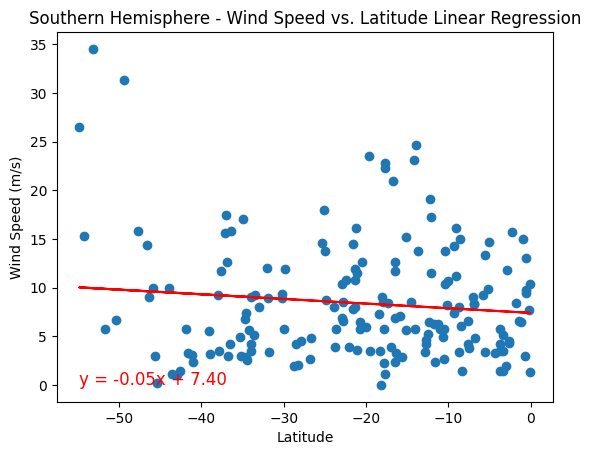

In [82]:
# Southern Hemisphere

# Extract latitude and wind speed columns from the DataFrame for the Southern Hemisphere
latitude_sh = city_data_df[city_data_df['Lat'] < 0]['Lat']
wind_speed_sh = city_data_df[city_data_df['Lat'] < 0]['Wind Speed']

# Perform linear regression using linregress for the Southern Hemisphere
slope_sh, intercept_sh, r_value_sh, p_value_sh, std_err_sh = linregress(latitude_sh, wind_speed_sh)

# Plot scatter plot for the Southern Hemisphere
plt.scatter(latitude_sh, wind_speed_sh, label='Wind Speed vs. Latitude (Southern Hemisphere)')

# Plot linear regression line for the Southern Hemisphere
plt.plot(latitude_sh, slope_sh * latitude_sh + intercept_sh, color='red', label='Linear Regression')

# Add labels and title for the Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')

# Print R-value and equation of the line for the Southern Hemisphere
equation_sh = f"y = {slope_sh:.2f}x + {intercept_sh:.2f}"
r_value_text = f"R-value = {r_value:.2f}"
plt.text(latitude_sh.min(), wind_speed_sh.min(), equation_sh, fontsize=12, color='red')
print(f"The r-value is: {r_value:.10f}")

# Display plot for the Southern Hemisphere
plt.show()

**Discussion about the linear relationship:** 

***Northern Hemisphere:***

Equation of the line: y=0.03x+9.29

R-value: -0.0917

Interpretation:
The negative R-value suggests a very weak negative correlation between wind speed and latitude in the Northern Hemisphere. The equation of the line indicates that as latitude increases (moving towards the North Pole), wind speed tends to slightly increase, but the relationship is almost negligible. The R-value of approximately -0.0917 suggests that there is almost no linear relationship between wind speed and latitude in this hemisphere based on the given data.

***Southern Hemisphere:***

Equation of the line: y=−0.05x+7.40

R-value: -0.0917

Interpretation:
Similarly, the negative R-value indicates a very weak negative correlation between wind speed and latitude in the Southern Hemisphere. The equation of the line suggests that as latitude increases (moving towards the South Pole), wind speed tends to slightly decrease. The R-value of approximately -0.0917 suggests that there is almost no linear relationship between wind speed and latitude in this hemisphere based on the given data.